In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

df = pd.read_csv ('D:\excelR\clustering\crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [3]:
df.rename(columns = {'Unnamed: 0':'State'}, inplace = True)

In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
df2=df.drop(labels='State', axis=1)

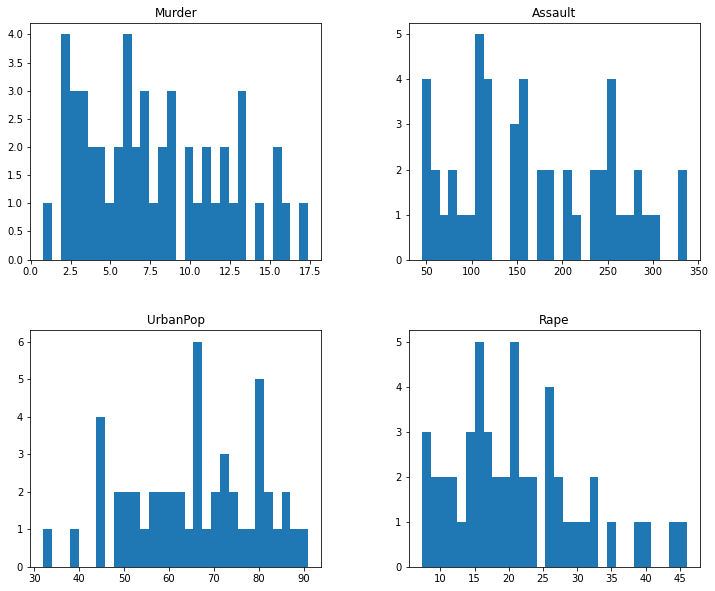

In [6]:
df2.hist(bins = 30, figsize = (12,10), grid = False)
plt.show()

In [7]:
from sklearn.preprocessing import normalize
df_norm = normalize(df2)

In [8]:
df_norm=pd.DataFrame(df_norm,columns=df2.columns)
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


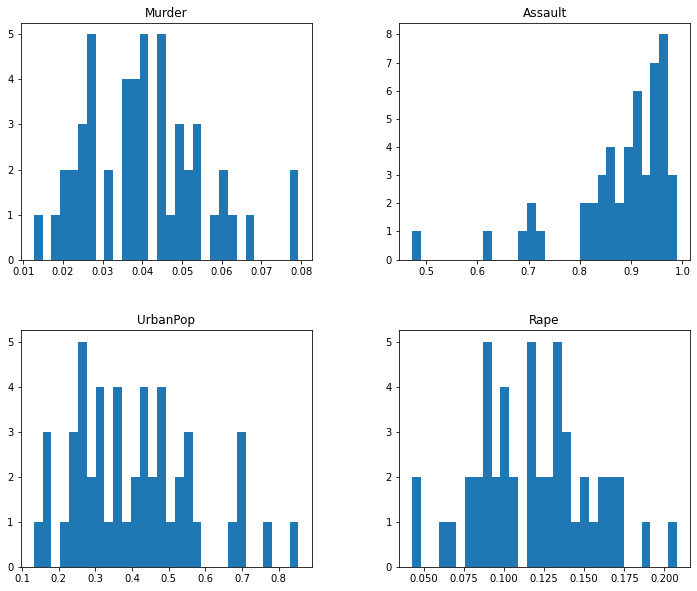

In [9]:
df_norm.hist(bins = 30, figsize = (12,10), grid = False)
plt.show()

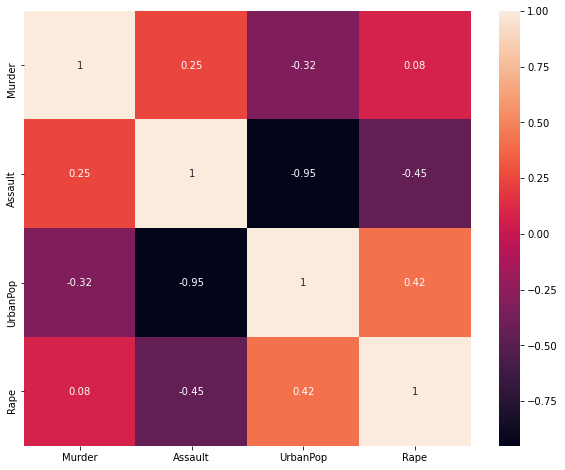

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_norm.corr().round(decimals=2), annot=True)
plt.show()

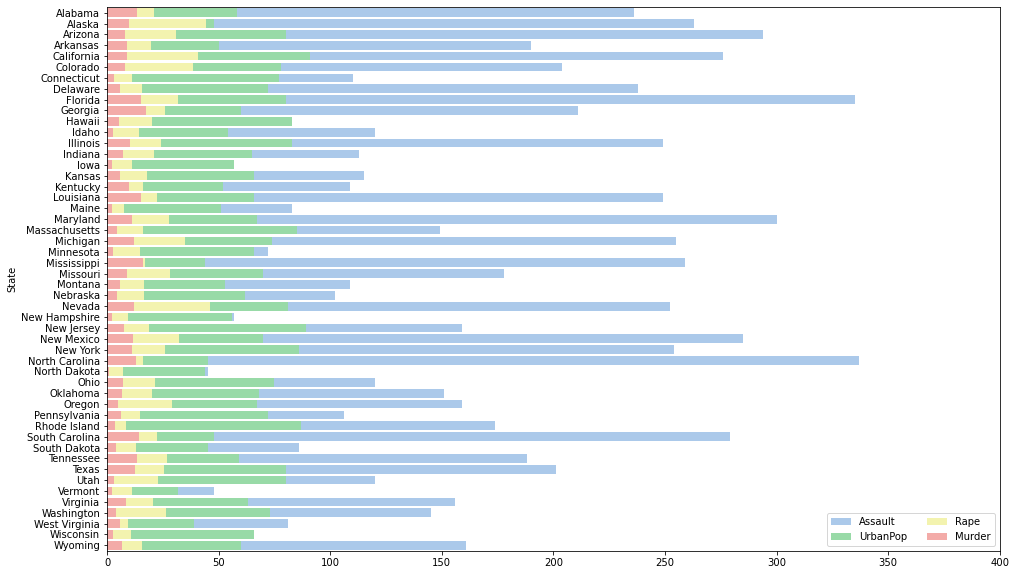

In [11]:
f, ax = plt.subplots(figsize=(16, 10))

sns.set_color_codes("pastel")

sns.barplot(x="Assault", y="State", data=df,
            label="Assault", color="b")

sns.barplot(x="UrbanPop", y="State", data=df,
            label="UrbanPop", color="g")

sns.barplot(x="Rape", y="State", data=df,
            label="Rape", color="y")

sns.barplot(x="Murder", y="State", data=df,
            label="Murder", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",xlabel='');

# Hierarchical clustering

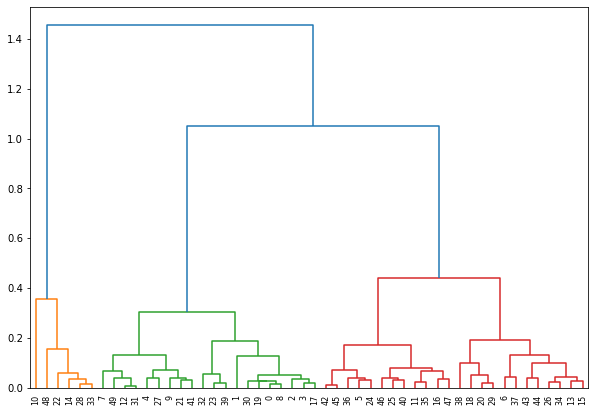

In [12]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(df_norm,'ward'))

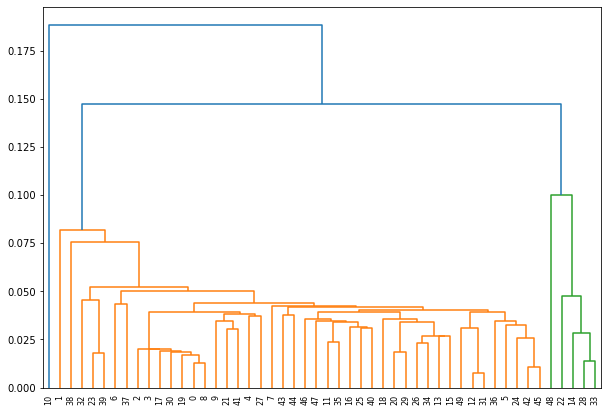

In [13]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(df_norm,'single'))

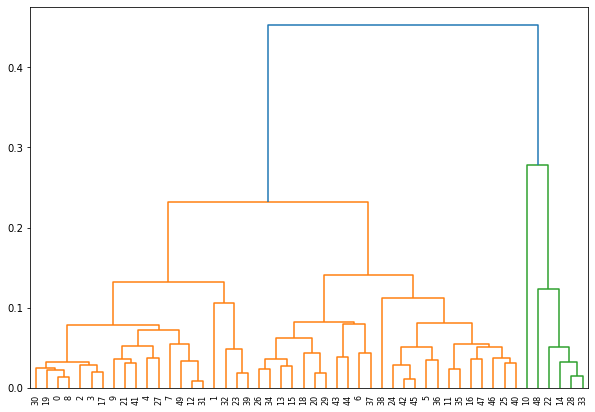

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(df_norm,'average'))

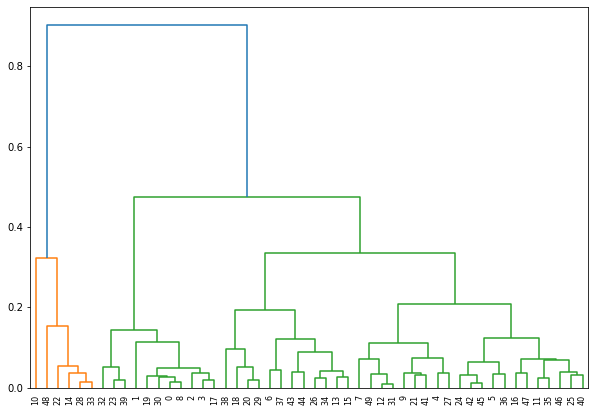

In [15]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(df_norm,'complete'))

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for n_clusters in range(2,8):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean')
    cluster_labels = clusterer.fit_predict(df_norm)   
    silhouette_avg = silhouette_score(df_norm, cluster_labels)
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6037116221173207
For n_clusters = 3 The average silhouette_score is : 0.5359200720251941
For n_clusters = 4 The average silhouette_score is : 0.44923935480079796
For n_clusters = 5 The average silhouette_score is : 0.4517242639432266
For n_clusters = 6 The average silhouette_score is : 0.3892142583931332
For n_clusters = 7 The average silhouette_score is : 0.3485941614129203


In [17]:
#we will chose 3 clusters for our clustering model
model1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
model3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model4 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')


#Predict and count numbers in each cluster
clus_solution1 = model1.fit_predict(df_norm)
clus_solution2 = model2.fit_predict(df_norm)
clus_solution3 = model3.fit_predict(df_norm)
clus_solution4 = model4.fit_predict(df_norm)

output1 = pd.DataFrame(data=clus_solution1)
output2 = pd.DataFrame(data=clus_solution2)
output3 = pd.DataFrame(data=clus_solution3)
output4 = pd.DataFrame(data=clus_solution4)

A=output1[0].value_counts(ascending=False)
B=output2[0].value_counts(ascending=False)
C=output3[0].value_counts(ascending=False)
D=output4[0].value_counts(ascending=False)

out=pd.concat([A,B,C,D], axis=1)
out.columns = ['ward', 'single', 'average', 'complete']
print(out)

   ward  single  average  complete
0    24       5       44        33
1     6       1        5         6
2    20      44        1        11


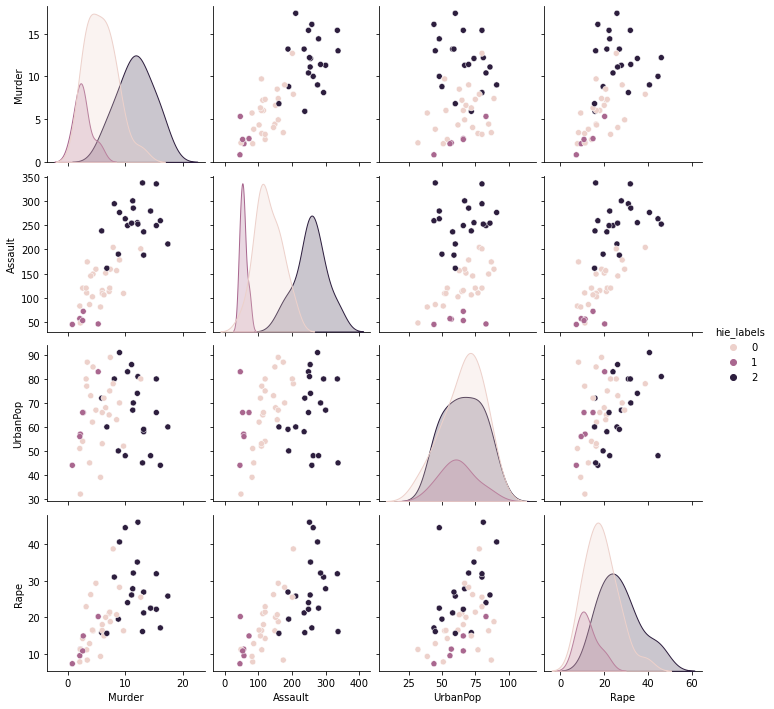

In [18]:
model1.fit_predict(df_norm)
df['hie_labels']=model1.labels_
g = sns.pairplot(df, hue="hie_labels", diag_kind="kde")

# K-means 

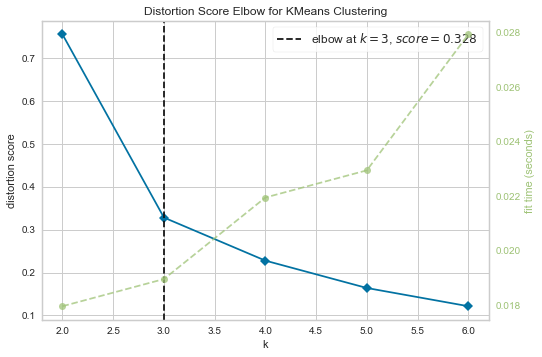

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
k=(2,7)
km = KMeans(n_clusters=k)    
visualizer = KElbowVisualizer(km, k=(2,7))
visualizer.fit(df_norm)        # Fit the data to the visualizer
visualizer.show()

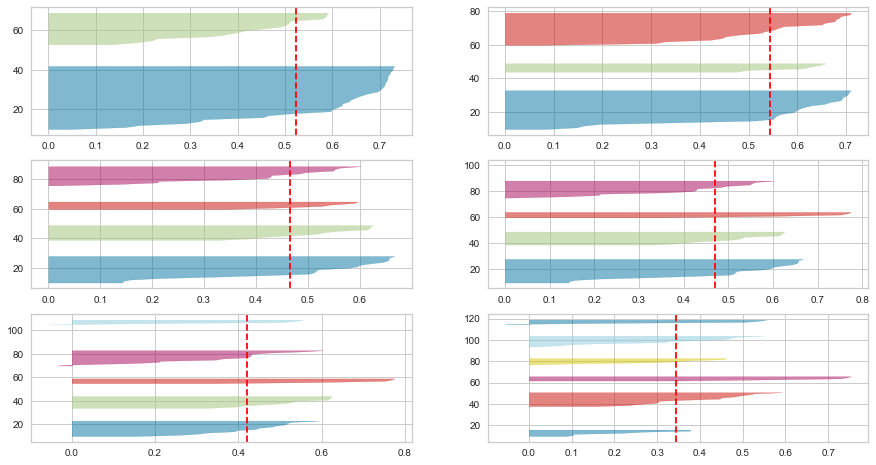

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
   
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
   
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_norm) 

Fig - Silhouette plots for n_clusters = 2 to n_clusters = 7. We can see that even though n_clusters=5 has the highest Silhouette score approx of 0.85 but choosing 4 clusters would be appropriate for the this clustering model as it shows more proper distribution as compared to the widths of the clusters when n_clusters=5 

In [21]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_norm)
kmodel = kmeanModel.predict(df_norm)
df3 = pd.DataFrame(data = kmodel)
df3[0].value_counts(ascending=False)
df['kmeanslabels']=kmeanModel.labels_
df.head()

,State,Murder,Assault,UrbanPop,Rape,hie_labels,kmeanslabels
0,Alabama,13.2,236,58,21.2,2,1
1,Alaska,10.0,263,48,44.5,2,1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,2,1
4,California,9.0,276,91,40.6,2,1


<Figure size 1440x1008 with 0 Axes>

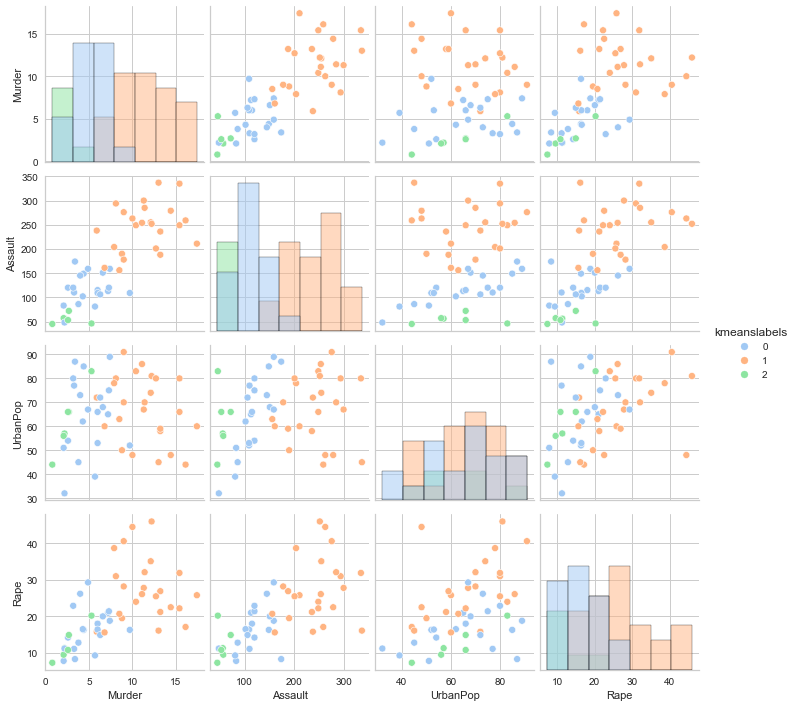

In [22]:
plt.figure(figsize=(20, 14))  
k = sns.pairplot(df, vars=['Murder','Assault','UrbanPop','Rape'], hue="kmeanslabels", diag_kind="hist",palette="pastel")

# DBSCAN

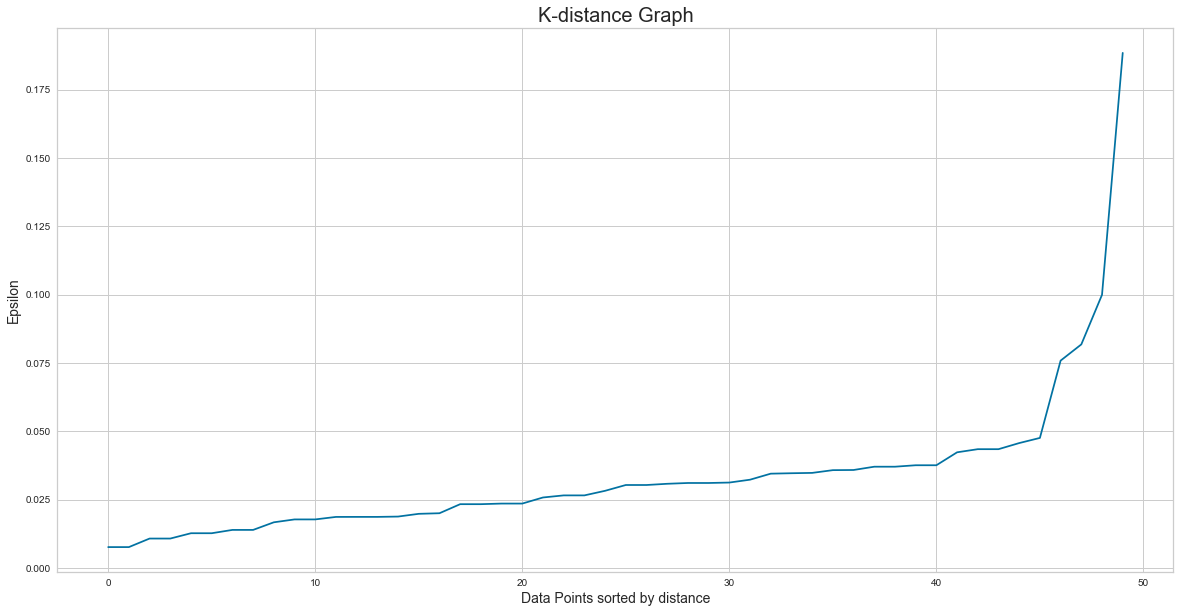

0.04349850435207942


<Figure size 360x360 with 0 Axes>

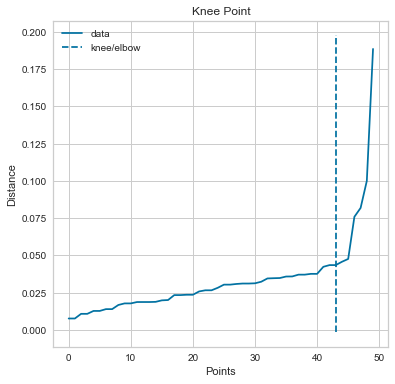

In [23]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_norm)
distances, indices = nbrs.kneighbors(df_norm)
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [24]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.043,min_samples=3)
dbscan_opt.fit(df_norm)

DBSCAN(eps=0.043, min_samples=3)

In [25]:
df['DBSCANlabels']=dbscan_opt.labels_
df['DBSCANlabels'].value_counts()

 1    25
 0    12
-1    10
 2     3
Name: DBSCANlabels, dtype: int64

<Figure size 1440x1008 with 0 Axes>

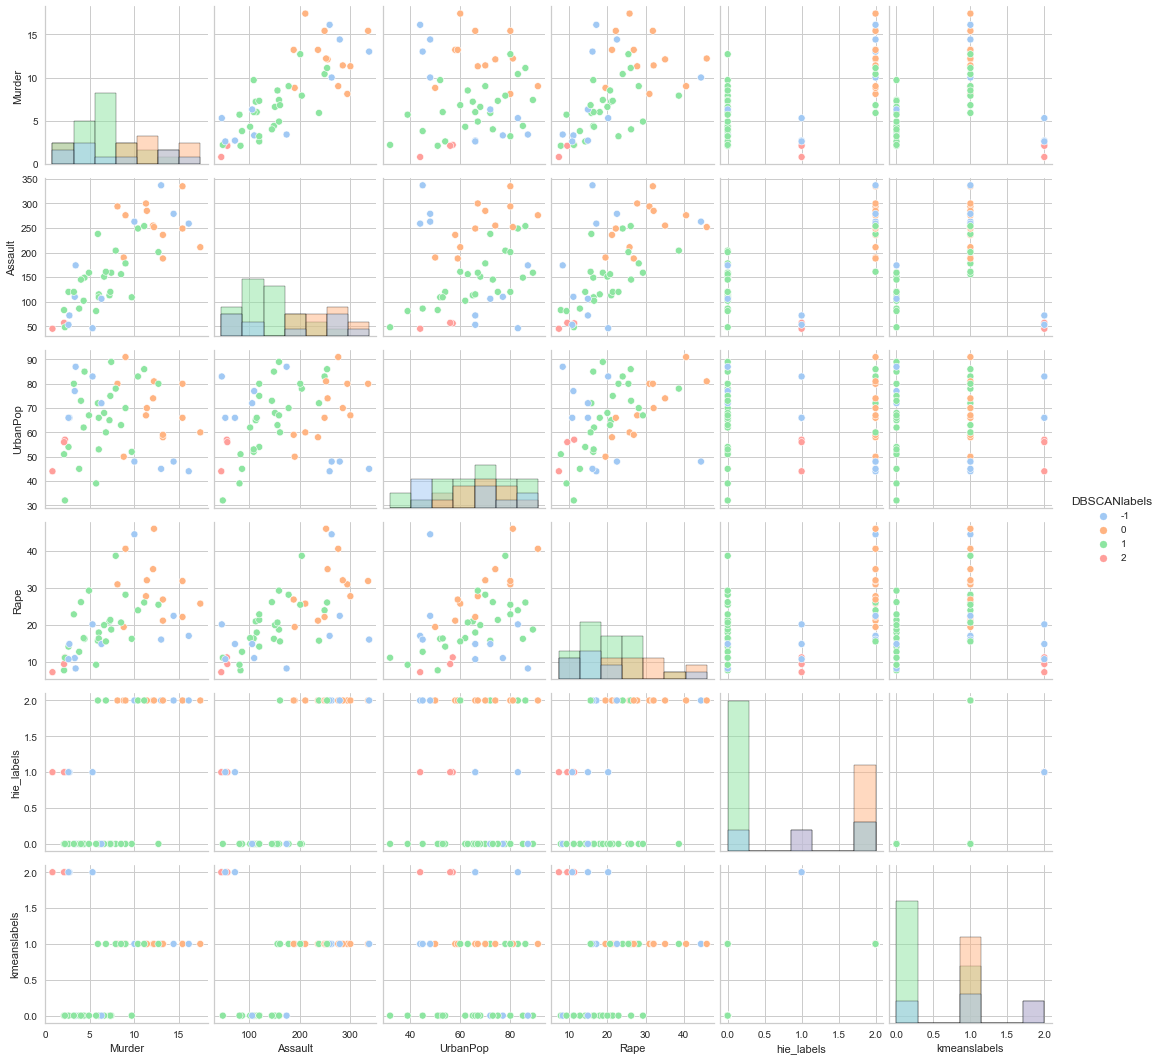

In [26]:
plt.figure(figsize=(20, 14))  
k = sns.pairplot(df, hue="DBSCANlabels", diag_kind="hist",palette="pastel")

In [27]:
df

,State,Murder,Assault,UrbanPop,Rape,hie_labels,kmeanslabels,DBSCANlabels
0,Alabama,13.2,236,58,21.2,2,1,0
1,Alaska,10.0,263,48,44.5,2,1,-1
2,Arizona,8.1,294,80,31.0,2,1,0
3,Arkansas,8.8,190,50,19.5,2,1,0
4,California,9.0,276,91,40.6,2,1,0
5,Colorado,7.9,204,78,38.7,0,1,1
6,Connecticut,3.3,110,77,11.1,0,0,-1
7,Delaware,5.9,238,72,15.8,2,1,1
8,Florida,15.4,335,80,31.9,2,1,0
9,Georgia,17.4,211,60,25.8,2,1,0
